# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

In [27]:
rootdir = '/content/drive/MyDrive/CIFAR-10-images-master/train'
train=[]
train_label=[]
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        for f in os.listdir(d):
            files = os.path.join(d, f)
            if os.path.isfile(files):
                with open(d+'/'+f,'rb') as fo:
                    img = np.asarray(Image.open(fo))
                    train.append(img)            
                    train_label.append(os.path.split(fo.name)[1])

train = np.array(train)
train_label = np.array(train_label)


rootdir = '/content/drive/MyDrive/CIFAR-10-images-master/test'

test=[]
test_label=[]
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        for f in os.listdir(d):
            files = os.path.join(d, f)
            if os.path.isfile(files):
                with open(d+'/'+f,'rb') as fo:
                    img = np.asarray(Image.open(fo))
                    test.append(img)            
                    test_label.append(os.path.split(fo.name)[1])

test = np.array(test)
test_label = np.array(test_label)





# KNN Implementation

In [42]:
class KNN(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred

In [31]:
print("Training data shape: ",train.shape)
print("Training data shape: ",train_label.shape)
print("Training data shape: ",test.shape)
print("Training data shape: ",test_label.shape)

Training data shape:  (50038, 32, 32, 3)
Training data shape:  (50038,)
Training data shape:  (10000, 32, 32, 3)
Training data shape:  (10000,)


## Subsampling

In [40]:
num_training = 10000
mask = list(range(num_training))
X_train = train[mask]
y_train = train_label[mask]

num_test = 1000
mask = list(range(num_test))
X_test = test[mask]
y_test = test_label[mask]

In [41]:
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(10000, 3072) (1000, 3072)


## Main Operation: Performing KNN

In [49]:
classifier = KNN()
classifier.train(X_train, y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

SyntaxError: ignored

## Validation

In [46]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
#         print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
        k_to_accuracies[k].append(accuracy)


print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

KeyboardInterrupt: ignored

## Show

KeyError: ignored

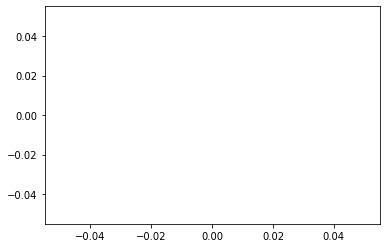

In [45]:


for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

